# Math 425 Computation Linear Algebra
## Final Project, Problem 1. 
##### *Topics in Matrix Transformation, Least-squares, Linear Modelling and Singular Vaule Decomposition.

### Group 3

+ Anneke Moeller; math validation, code review and testing
+ Shem Cheng; visualization enhancements, code review and testing
+ Rai’d Muhammad; code review and user testing
+ Brent Thorne; scheduling, software and reporting

In [1]:
# environment setup...
# we will try to make it clear which library we're using for what
import sympy as sym # symbolic maths 
from sympy.matrices import Matrix # pretty matrices
from mpl_toolkits.mplot3d import Axes3D # spatial visuals, like 3d quivers 
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # pretty printing

### Problem 1. Escher in the Matrix - Tiling the plane
##### Create an Escher like artwork by tiling the model bird.

In [2]:
class bird:  # free bird
    """
    import point data and return bird object
    provides functions transform and plot
    assumes sympy Matrix is 2-rows (2xn)
    recall: A m×n matrix has m rows and n columns.    
    """
    def __init__(self, D):
        assert isinstance(D, Matrix) # eat 2xm matrix of points and make homogenous
        self.T = sym.eye(3)  # consider feature to set transform on creation
        self.D = D
        self.D = self.D.col_join(sym.ones(1,self.D.cols)) # make homogenous
        self.colors = ["green", "red",  "blue", "yellow"]
        self.colorIndex = 0
        
    def eye(self):
        self.T = sym.eye(3) # we see you
        self.colorIndex = 0;
    
    def plot(self, title = 'Fly like an Eagle.'): # hold figure: see bird.show()
     #   lim=1.5 # consider feature to set limits based on origin and average points
        DD = self.T * self.D  # do inner product at plotting
        plt.title(f"{title}"); plt.xlabel("X axis"); plt.ylabel("Y axis")
        plt.scatter(list(DD.row(0)), list(DD.row(1)), color ="red", s=10)
        plt.plot(list(DD.row(0)), list(DD.row(1)), color ="blue", linewidth=1, markersize=12)
        plt.fill(list(DD.row(0)), list(DD.row(1)), color =self.colors[self.colorIndex%len(self.colors)], alpha=0.5)
        self.colorIndex+=1
        
     #   plt.xlim(-lim,lim); plt.ylim(-lim,lim)
        plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
        plt.axhline(0, color='black', linestyle='--')
        plt.axvline(0, color='black', linestyle='--')
                
    def show(self): # this stops the figure hold: see bird.plot()
        self.colorIndex = 0;
        plt.show()
        
    def __mul__(self, other): # dot the transform
        if isinstance(other, Matrix): 
            self.T = other * self.T
        else:
            return NotImplemented
        
    def dot(self, other): # dot yourself
        return self.__mul__(other)

    def translate(self, a, b):
        self.T = Matrix([[1,0,a], [0,1,b], [0,0,1]]) * self.T
    
    def mirror(self, a,b,c): # mirror on line formed by f(a,b,c)= ax+by-c=0, dot yourself
        self.T = 1/(a**2+b**2)*Matrix([\
        [b**2-a**2,    -2*a*b, -2*a*c],\
        [   -2*a*b, a**2-b**2, -2*b*c],\
        [        0,         0, a**2+b**2]]) * self.T
        
    def rotate(self, theta): # rot and dot yourself
        self.T = Matrix([[sym.cos(theta),-sym.sin(theta),0],\
        [sym.sin(theta),sym.cos(theta),0],\
        [0,0,1]]) * self.T

    def report(self): # so pretty
        display(Latex(f'$TD={sym.latex(self.T)}\
        {sym.latex(self.D.n(2))}$')) 
        display(Latex(f'$TD={sym.latex(Matrix(self.T*self.D).n(2))}$ * rounded to two decimal points')) 

#### (a) Take four tiles of the model bird and fit them together according to the instructions

In [3]:
# The ten endpoints of the line segments are 
P = [(0.3036, 0.1960), (0.6168, 0.2977), (0.7128,0.4169), (0.7120, 0.1960), (0.9377, 0.2620),\
     (0.7120, 0.5680), (0.3989, 0.6697), (0.3028,0.7889), (0.3036, 0.5680), (0.5293, 0.5020)]

# format our data as a matrix
for i in range(len(P)+1):
    if i == 0:
        V = Matrix(P[0]) # create model bird shape
    elif i >= len(P):
        V = V.row_join(Matrix(P[0])) # add an extra endpoint vector to close our line
    else:
        V = V.row_join(Matrix(P[i]))

##### i. Create the first tile by rotating the model bird through π radians about the point (0.7120, 0.4320). Provide the matrix for the transformation in homogeneous coordinates.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

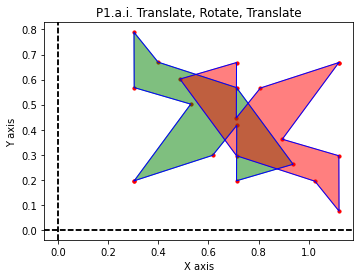

In [4]:
# P1.a.i
B = bird(V) # fly the model bird shape
#B.report()
B.plot("P1.a Untransformed")
#B.show()

# Create first tile
#B.dot(Matrix([[1,0,-0.7120],[0,1,-0.4320],[0,0,1]])) # shift point to origin, see: bird.translate()
B.translate(-0.7120,-0.4320) # use translate to shift instead of matrix
B.rotate(sym.pi) # rotate by pi
B.translate(0.7120,0.4320) # shift back
B.plot("P1.a.i. Translate, Rotate, Translate")
B.report()
T1 = B.T # save transpose

##### ii. Form the second tile by reflecting the model bird through the horizontal line y = 0.6180 and then translating this image by 0.4084 units along the x-axis.  Provide the matrix for the transformation in homogeneous coordinates.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

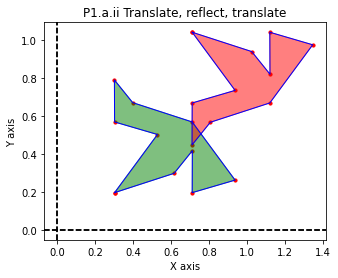

In [5]:
# P1.a.ii
B.eye() # restore model bird
B.plot()
# B.mirror(0,-0.6180,0) # reflect on line, not working as expected TESTME!!!
# Actually, above works however there is an extra step to format the line equation.
# Much easiler to take dot products to shift, reflect, shift

B.translate(0,-0.6180) # shift y
B.dot(Matrix([[1,0,0],[0,-1,0],[0,0,1]])) # mirror y-axis
B.translate(0,0.6180) # shift y
B.translate(0.4084,0) # shift x
B.plot("P1.a.ii Translate, reflect, translate")
B.report()
T2 = B.T

##### iii. To create the third tile, reflect the model bird through the vertical line x = 0.5078 and translate the image by 0.1000 along the y-axis. Provide the matrix for the transformation in homogeneous coordinates.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

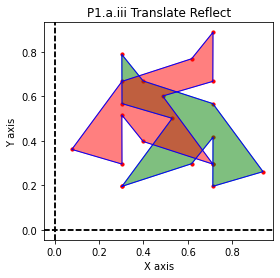

In [6]:
# P1.a.iii
B.eye() 
B.plot()

B.translate(-0.5078,0) # shift x
B.dot(Matrix([[-1,0,0],[0,1,0],[0,0,1]])) # mirror on x-axis
B.translate(0.5078,0) # shift x back  
B.translate(0,0.1) # translate y

B.plot("P1.a.iii Translate Reflect")
B.report()

T3 = B.T

##### iv. Create the fourth tile by translating the model bird along the y-axis by 0.4720. Provide the matrix for the transformation in homogeneous coordinates.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

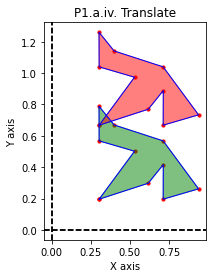

In [7]:
# P1.a.iv
B.eye()
B.plot()
B.translate(0,0.4720) # shift y
B.plot("P1.a.iv. Translate")
B.report()

T4 = B.T

##### v. Graph all four tiles together to produce the base pattern.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

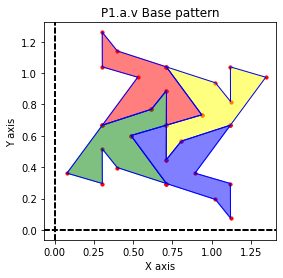

In [8]:
TT = [T1, T2, T3, T4]
for T in TT:
    B.T = T; B.plot("P1.a.v Base pattern")
    display(Latex(f'${sym.latex(B.T)}$'))

#### (b) Repeat the pattern of four model birds in part (a) but translate the entire pattern by 0.7441n, n = 1, 2, 3 along the y-axis to produce a column of the tilings.

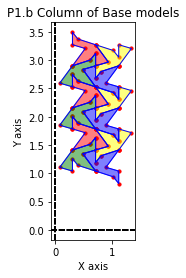

In [9]:
TT = [T1, T2, T3, T4]
for m in range(1,3+1):
    for T in TT:
        B.T = T
        B.translate(0,0.7441*m)
        B.plot("P1.b Column of Base models")

#### (c) Repeat parts (b) and translate the column of tilings by −0.8168n, n = 1, 2, 3, 4, 5 (along the x-axis) to produce the final pattern.

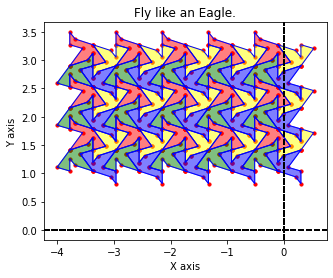

In [10]:
TT = [T1, T2, T3, T4]
for n in range(1,5+1):
    for m in range(1,3+1):
        for T in TT:
            B.T = T
            B.translate(-0.8168*n,0.7441*m)
            B.plot()